In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
import networkx as nx
%matplotlib inline
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.stats import mode
from sklearn.manifold import spectral_embedding
from sklearn.metrics import normalized_mutual_info_score, silhouette_score

data = pd.read_csv('newData.csv')
data.head()

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.0,1
1,1.045,0.0,1
2,2.080,0.0,1
3,3.125,0.0,1
4,4.180,0.0,1


[[-0.22941573 -0.06149947]
 [-0.22941573  0.00142643]
 [-0.22941573  0.06430736]
 [-0.22941573  0.12516097]
 [-0.22941573  0.18206884]
 [-0.22941573  0.23323692]
 [-0.22941573  0.27705212]
 [-0.28097574  0.38228347]
 [-0.22941573  0.32229357]
 [-0.22941573  0.32229357]
 [-0.28097574 -0.28300862]
 [-0.32444284 -0.36133464]
 [-0.22941573 -0.26381917]
 [-0.22941573 -0.26381917]
 [-0.22941573 -0.12248657]
 [-0.22941573 -0.17961224]
 [-0.22941573 -0.24718517]]


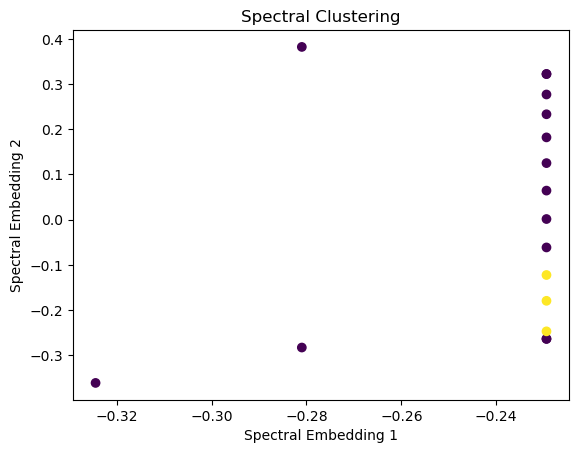

In [11]:
x = data.drop('Class/Cluster',axis=1)
x_scaled = StandardScaler().fit_transform(x)
k = 1
svd= TruncatedSVD(n_components=k)
finalData = svd.fit_transform(x_scaled)
y = data['Class/Cluster']
neighbor_indices = np.zeros((len(finalData), 2), dtype=int)
adj_matrix=np.zeros((len(finalData), len(finalData)), dtype=int)
for i in  range(len(finalData)):
    distance = []
    for j in range(len(finalData)):
        if(i!=j):
            d = (np.sqrt(np.sum(np.square(finalData[i,:] - finalData[j,:]))))
            distance.append((j,d))  
    distance = np.array(distance)
    distance = sorted(distance, key=lambda x: x[1])[:2]
    closest_indices = [x[0] for x in distance]
    for k in closest_indices:
        adj_matrix[i][int(k)]=1
        adj_matrix[int(k)][i]=1
##print(adj_matrix)
D=np.diag(np.sum(adj_matrix,axis=1))
L=D-adj_matrix
D_norm = np.diag(1 / np.sqrt(np.sum(adj_matrix, axis=1)))
L_norm = D_norm.dot(L).dot(D_norm)
eigenvalues, eigenvectors = np.linalg.eigh(L_norm)
indices = np.argsort(eigenvalues)[:2]
spectral_embeddings = eigenvectors[:, indices]
print(spectral_embeddings)
##pectral_embeddings = spectral_embedding(L_norm, n_components=3, norm_laplacian=True)
plt.scatter(spectral_embeddings[:, 0], spectral_embeddings[:, 1], c=y)
plt.xlabel('Spectral Embedding 1')
plt.ylabel('Spectral Embedding 2')
plt.title('Spectral Clustering')
plt.show()

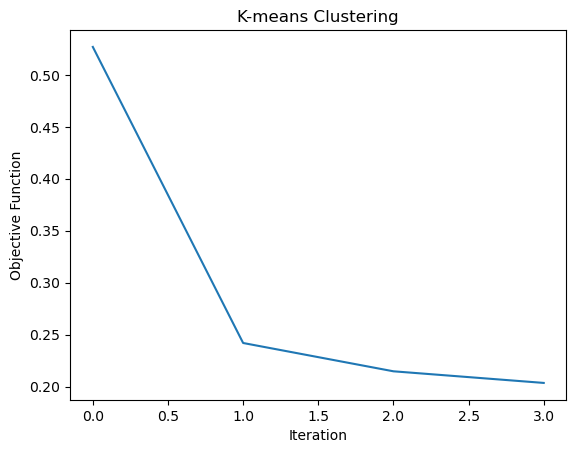

In [12]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
np.random.seed(0)
centroids = spectral_embeddings[np.random.choice(len(spectral_embeddings), size=2, replace=False)]
values = []
for i in range(100):
    dist = np.zeros((spectral_embeddings.shape[0], centroids.shape[0]))
    for j in range(spectral_embeddings.shape[0]):
        for k in range(centroids.shape[0]):
            dist[j][k] = euclidean_distance(spectral_embeddings[j], centroids[k])
    assignments = np.argmin(dist, axis=1)
    newCentroids = np.array([spectral_embeddings[assignments == k].mean(axis=0) for k in range(2)])
    obj_val = ((spectral_embeddings - centroids[assignments])**2).sum()
    values.append(obj_val)
    if np.allclose(centroids, newCentroids):
        break
    centroids = newCentroids
plt.plot(range(i+1), values)
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('K-means Clustering')
plt.show()